### Replicando o modelo das flores Iris

#### 1 - Conhecendo os dados

Importando os materiais.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_dataset = load_iris() 

<br>

Verificando quais são as keys do dataset:

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<br>

Descrição dos dados (apenas a parte inicial, no caso até a posição 200 dos caracteres na string que é o value da key DESCR):

In [3]:
print(iris_dataset['DESCR'][:200])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive


<br>

Verificando o conteúdo (value) da key `target_names`:

In [4]:
print("Target names: {}".format(iris_dataset['target_names']))
# Retorna as especies de flores que serão previstas.

Target names: ['setosa' 'versicolor' 'virginica']


<br>

Verificando o value da key `feature_names`:

In [5]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))
# Retorna o título de cada feature

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<br>

Os dados estão contidos nas keys `target` e `data`.
<br>
Podemos usar `type` e verificar que as keys são um array numpy.
<br>
Usando `shape` podemos ver quantas linhas e colunas tem cada array.
<br>
Faremos primeiro para a key `data` e depois para `target`:

In [6]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [7]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [8]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


<br> Analisando agora o array `target`:

In [9]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [10]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [11]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Lembrando que os valores de cada array estão associados com os títulos que havíamos explorado anteriormente (`target_names` e `feature_names`.)

---

#### 2 - Separando os dados de treino e teste

Para separar os dados vamos usar a função `train_test_split` do *scikit-learn*:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

Essa função separa 75% dos dados para treino e 25% dos dados para os testes de previsão. Antes de separar, embaralha os dados usando um número pseudoaleatorio. O parâmetro `random_state` serve para armazenar o número pseudoaleatorio gerado e não embaralhar os dados de forma diferente toda vez que a função for chamada no código (isso geraria outputs diferentes para cada execução).

In [13]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


---

#### 3 - Visualizando os dados

Vamos criar um gráfico do tipo *scatter* para analisar os dados.
<br>
Primeiro, transformar os dados em um DataFrame do pandas.

In [15]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

#visualizando o dataframe criado
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


<br> Usando o módulo `plotting` do Pandas, podemos criar o gráfico. 

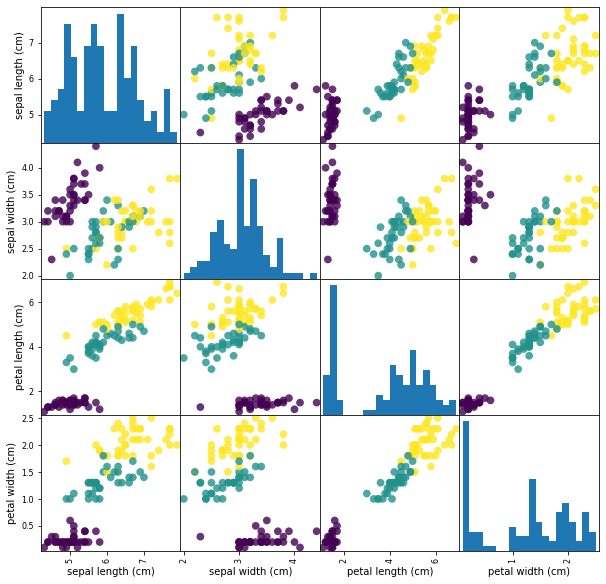

In [16]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

# Sobre os parâmetros:

# alpha = quantidade de transparência (opacidade)
# figsize = tamanho da figura em polegadas (largura, altura)
# marker = tipo de marcador usado no gráfico (nesse são bolinhas)
# c = cor das bolinhas 
# hist_kwds={'bins': n} ==> número de barras (n) que aparecem no histograma
# s = não achei na documentação, mas acredito que seja "size" ou "scale", pois alterar seu valor altera o tamanho das bolinhas.

<br> Analisando os gráficos, percebe-se que as 3 espécies de flores estão relativamente bem separadas de acordo com as medidas de pétalas e sépalas. Isso significa que um modelo de machine learning provavelmente conseguirá serpará-las de forma eficiente.

---

#### 4 - Construíndo o modelo

Para construção do modelo vamos utilizar o algoritmo *k-nearest neighbors* (k-vizinhos mais próximos).
<br>
Vamos importar a classe `KNeighborsClassifier` do módulo `neighbors` do `scikit-learn`.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Para nosso caso vamos utilizar somente um vizinho próximo para cada ponto a ser classificado.
knn = KNeighborsClassifier(n_neighbors=1)

<br> O objeto `knn` encapsula o algoritmo que vai ser usado para construir o modelo usando os dados de treino, assim como o algoritmo usado para fazer previsões para novos dados. 
<br>
Para construir o modelo com os dados de treino, vamos usar o método `fit` no objeto `knn`.

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

---

#### 5 - Fazendo previsões

Vamos supor que encontramos na natureza uma iris com comprimento de sépala de 5cm, largura de sépala de 2,9cm, comprimento de pétala de 1cm e largura de pétala 0.2cm. 
<br>
Para prever a espécie dessa flor, vamos primeiro por esses dados em um array NumPy: 

In [19]:
# Organizando os dados em um array NumPy

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


<br> Agora que os dados estão no formato adequado podemos com eles usar o método `predict` no objeto `knn`.

In [20]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


---

#### 6 - Medindo a eficácia do modelo

Vamos utilizar agora o conjunto de testes (25% do total de dados) que separamos anteriormente no modelo para medir a sua **acurácia**, que é a fração de flores cujas espécies foram previstas corretamente. Para este fim, podemos usar o método `score` no objeto `knn`:

In [23]:
# Montando o conjunto de previsões para os dados de teste:
y_pred = knn.predict(X_test)
print("Previsões do conjunto de testes: \n {}".format(y_pred))

# Medindo a acurácia:
print("Acurácia: {:.2f}".format(knn.score(X_test, y_test)))

Previsões do conjunto de testes: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Acurácia: 0.97


Ou seja, para este modelo, acertamos as previsões de 97% das flores no conjunto de testes. No caso em questão é razoável assumir que podemos esperar 97% de chance de acerto na determinação da espécie de novas flores catalogadas.